# ЛР 3
## Задания:
1. Провести классификацию найденного датасета, методами линеной и логистической регрессий . В формате *Markdown* написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv', index_col=0)  

In [3]:
df

,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
AccountAge,,,,,,,,,,,,,,,,,,,,
20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,12.041577,216.748394,Standard,Bank transfer,No,Both,No,Mobile,15.720485,123.854169,29,Sci-Fi,3.960361,4,Female,18,Yes,No,NKNHL3SRNX,0
57,10.104155,575.936861,Basic,Credit card,Yes,Both,Yes,TV,23.795246,161.325894,42,Comedy,3.910286,2,Male,22,No,Yes,24794SG5S1,0
56,12.205436,683.504390,Premium,Credit card,No,TV Shows,Yes,Mobile,1.332610,140.223702,45,Fantasy,4.571555,1,Male,4,Yes,Yes,VYGN9JRW4P,0


Замена текстовых категориальных признаков на числовые

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['SubscriptionType'] = labelencoder.fit_transform(df['SubscriptionType'])
df['PaymentMethod'] =  labelencoder.fit_transform(df['PaymentMethod'])
df['PaperlessBilling'] =  labelencoder.fit_transform(df['PaperlessBilling'])
df['ContentType'] =  labelencoder.fit_transform(df['ContentType'])
df['MultiDeviceAccess'] =  labelencoder.fit_transform(df['MultiDeviceAccess'])
df['DeviceRegistered'] =  labelencoder.fit_transform(df['DeviceRegistered'])
df['GenrePreference'] =  labelencoder.fit_transform(df['GenrePreference'])
df['Gender'] =  labelencoder.fit_transform(df['Gender'])
df['ParentalControl'] =  labelencoder.fit_transform(df['ParentalControl'])
df['SubtitlesEnabled'] =  labelencoder.fit_transform(df['SubtitlesEnabled'])
df['CustomerID'] =  labelencoder.fit_transform(df['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100029 entries, 20 to 77
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MonthlyCharges            100029 non-null  float64
 1   TotalCharges              100029 non-null  float64
 2   SubscriptionType          100029 non-null  int32  
 3   PaymentMethod             100029 non-null  int32  
 4   PaperlessBilling          100029 non-null  int32  
 5   ContentType               100029 non-null  int32  
 6   MultiDeviceAccess         100029 non-null  int32  
 7   DeviceRegistered          100029 non-null  int32  
 8   ViewingHoursPerWeek       100029 non-null  float64
 9   AverageViewingDuration    100029 non-null  float64
 10  ContentDownloadsPerMonth  100029 non-null  int64  
 11  GenrePreference           100029 non-null  int32  
 12  UserRating                100029 non-null  float64
 13  SupportTicketsPerMonth    100029 non-null  int64  
 

Разбиение на train/test и обучение модели с разными параметрами (Линейная регрессия)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['Churn'])
Y = df['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.fit_transform(X_test)

under_sampler = RandomUnderSampler(random_state=27)
X_resampled, Y_resampled = under_sampler.fit_resample(X_train, Y_train)

param_grid = {'fit_intercept': [True, False]}

linear_model = LinearRegression()

linear_grid = GridSearchCV(linear_model, param_grid, cv=5)
linear_grid.fit(X_resampled, Y_resampled)

best_params = linear_grid.best_params_
best_fit_intercept = best_params['fit_intercept']
print(f"Лучшие параметры для линейной регрессии: fit intercept: {best_fit_intercept}")

Лучшие параметры для линейной регрессии: fit intercept: True


Оценка точности и отчёт:

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Y_pred = linear_grid.predict(X_test)
rounded_Y_pred = [round(pred) if pred > 0 else 0 for pred in Y_pred]
mae = mean_absolute_error(Y_test, rounded_Y_pred)
mse = mean_squared_error(Y_test, rounded_Y_pred)
r2 = r2_score(Y_test, rounded_Y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R^2: ", r2)

accuracy = accuracy_score(Y_test, rounded_Y_pred)
report = classification_report(Y_test, rounded_Y_pred, zero_division = 1)

print(f'Точность модели: {accuracy}')
print(report)


MAE:  0.31933753207371124
MSE:  0.31933753207371124
R^2:  -1.1372836496023773
Точность модели: 0.6806624679262888
              precision    recall  f1-score   support

           0       0.90      0.68      0.78     24522
           1       0.32      0.68      0.44      5487

    accuracy                           0.68     30009
   macro avg       0.61      0.68      0.61     30009
weighted avg       0.80      0.68      0.71     30009



Разбиение на train/test и обучение модели с разными параметрами (Логистическая регрессия)

In [8]:
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['Churn'])
Y = df['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.fit_transform(X_test)

under_sampler = RandomUnderSampler(random_state=27)
X_resampled, Y_resampled = under_sampler.fit_resample(X_train, Y_train)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

logistic_model = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=1000)

logistic_grid = GridSearchCV(logistic_model, param_grid, cv=5)
logistic_grid.fit(X_resampled, Y_resampled)

best_params = logistic_grid.best_params_
best_C = best_params['C']
best_penalty = best_params['penalty']
print(f"Лучшие параметры для линейной регрессии: C: {best_C}, Penalty: {best_penalty}")

Лучшие параметры для линейной регрессии: C: 0.01, Penalty: l1


Оценка точности и отчёт:

ROC-AUC score: 0.7398821100037789


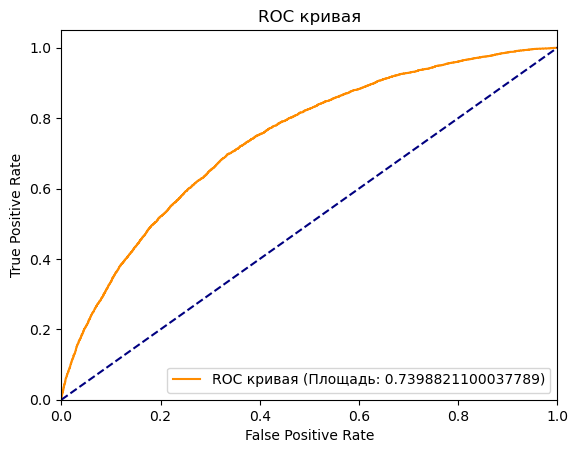

Точность модели: 0.6768969309207238
              precision    recall  f1-score   support

           0       0.91      0.68      0.77     24522
           1       0.32      0.69      0.44      5487

    accuracy                           0.68     30009
   macro avg       0.61      0.68      0.61     30009
weighted avg       0.80      0.68      0.71     30009



In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

Y_pred = logistic_grid.predict(X_test)
Y_proba = logistic_grid.predict_proba(X_test)

Y_proba = Y_proba[:, 1]
rocauc_score = roc_auc_score(Y_test, Y_proba)

print(f"ROC-AUC score: {rocauc_score}")

fpr, tpr, treshold = roc_curve(Y_test, Y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label= f'ROC кривая (Площадь: {roc_auc})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC кривая')
plt.show()

accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test,  Y_pred, zero_division = 1)

print(f'Точность модели: {accuracy}')
print(report)